# Preprocessing & Visualisasi Data
- **Tujuan**: Memproses ulang data menjadi bentuk yang berguna untuk model pembelajaran mesin.
- **Pentingnya Visualisasi** Data: Memahami data lebih penting daripada bagian pembelajaran mesin itu sendiri, tetapi sering diabaikan.
- **Data yang Digunakan**: Konsumsi alkohol siswa dan dampak yang diakibatkan ([diakses dari Kaggle](https://www.kaggle.com/uciml/student-alcohol-consumption)).

In [1]:
# Install kaggle
!pip install kaggle

In [2]:
# Download dataset
!kaggle datasets download -d uciml/student-alcohol-consumption -p data
!unzip ./data/student-alcohol-consumption.zip -d ./data

Dataset URL: https://www.kaggle.com/datasets/uciml/student-alcohol-consumption
License(s): CC0-1.0
  0% 0.00/18.4k [00:00<?, ?B/s]
100% 18.4k/18.4k [00:00<00:00, 22.7MB/s]
Archive:  ./data/student-alcohol-consumption.zip
  inflating: ./data/student-mat.csv  
  inflating: ./data/student-merge.R  
  inflating: ./data/student-por.csv  


In [35]:
import pandas as pd

# some CSV files are not separated with comma, but weirdly with some other symbols, such as semicolon ';' in this case...
df = pd.read_csv('data/student-mat.csv')

# In case you have too many columns, pandas automatically skips to display some of the columns in the middle.
# We will disable this option for this exercise.
pd.set_option('display.max_columns', None)

df.head(5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


## 1. Preprocessing

### 1.1. Sampling

#### Menangani Kumpulan Data yang Besar
- **Tantangan**: Jutaan entri bisa sangat membingungkan.
- **Solusi**: Lakukan subsampling pada data untuk membuat kumpulan data yang lebih kecil dan mudah dikelola.

#### Mengapa Subsampling?
- Membantu Anda **melihat lebih dalam** ke kumpulan data.
- Memungkinkan Anda untuk **mengembangkan wawasan** dengan lebih mudah.

#### Subsampling di Pandas
- **Perintah sederhana**: df.sample()
- Mengambil **subsample acak** dari DataFrame.



In [36]:
sampled = df.sample(n=10)
sampled

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
333,GP,F,18,U,LE3,T,2,2,other,other,home,other,1,2,0,no,no,no,yes,no,yes,yes,yes,4,3,3,1,1,2,0,8,8,0
348,GP,F,17,U,GT3,T,4,3,health,other,reputation,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,4,4,3,1,3,4,0,13,15,15
106,GP,F,15,U,GT3,T,2,2,other,other,course,mother,1,4,0,yes,yes,yes,no,yes,yes,yes,no,5,1,2,1,1,3,8,7,8,8
60,GP,F,16,R,GT3,T,4,4,health,teacher,other,mother,1,2,0,no,yes,no,yes,yes,yes,no,no,2,4,4,2,3,4,6,10,11,11
132,GP,F,17,U,LE3,T,2,2,other,other,course,father,1,1,0,no,yes,no,no,yes,yes,yes,yes,3,4,4,1,3,5,12,10,13,12
206,GP,F,16,U,GT3,A,3,1,services,other,course,mother,1,2,3,no,yes,yes,no,yes,yes,yes,no,2,3,3,2,2,4,5,7,7,7
339,GP,F,17,R,GT3,A,3,2,other,other,home,mother,1,2,0,no,yes,yes,no,yes,yes,yes,no,4,3,3,2,3,2,4,9,10,10
285,GP,M,17,U,GT3,T,1,1,other,other,reputation,father,1,2,0,no,no,yes,no,no,yes,yes,no,4,3,3,1,2,4,2,12,10,11
346,GP,M,18,R,GT3,T,4,3,teacher,services,course,mother,1,3,0,no,no,no,no,yes,yes,yes,yes,5,3,2,1,2,4,9,16,15,16
347,GP,M,18,U,GT3,T,4,3,teacher,other,course,mother,1,3,0,no,yes,yes,no,yes,yes,yes,yes,5,4,5,2,3,5,0,10,10,9


#### Alternatif Subsampling
- Anda juga bisa menggunakan argumen `frac`.
- `frac` menentukan persentase data asli yang ingin disampling.
#### Contoh Penggunaan `frac`
- Misal: Untuk mengambil 2% dari data asli, panggil perintah seperti berikut:
- `df.sample(frac=0.02)`

In [37]:
sampled2 = df.sample(frac=0.02)
sampled2

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
166,GP,M,16,U,GT3,T,2,2,other,other,course,father,1,2,0,no,no,no,no,yes,no,yes,no,4,3,5,2,4,4,4,10,10,10
286,GP,F,18,U,GT3,T,2,2,at_home,at_home,other,mother,1,3,0,no,yes,yes,no,yes,yes,yes,no,4,3,3,1,2,2,5,18,18,19
58,GP,M,15,U,LE3,T,1,2,other,at_home,home,father,1,2,0,yes,yes,no,yes,yes,yes,yes,no,4,3,2,1,1,5,2,9,10,9
110,GP,M,15,U,LE3,A,4,4,teacher,teacher,course,mother,1,1,0,no,no,no,yes,yes,yes,yes,no,5,5,3,1,1,4,6,18,19,19
241,GP,M,17,R,LE3,A,4,4,teacher,other,course,mother,2,2,0,no,yes,yes,no,yes,yes,yes,no,3,3,3,2,3,4,2,10,11,12
173,GP,F,16,U,GT3,T,1,3,at_home,services,home,mother,1,2,3,no,no,no,yes,no,yes,yes,yes,4,3,5,1,1,3,0,8,7,0
50,GP,F,16,U,LE3,T,2,2,services,services,course,mother,3,2,0,no,yes,yes,no,yes,yes,yes,no,4,3,3,2,3,4,2,12,13,13
52,GP,M,15,U,LE3,A,4,2,health,health,other,father,2,1,1,no,no,no,no,yes,yes,no,no,5,5,5,3,4,5,6,11,11,10


### 1.2. Mapping

#### Perhatikan Format Non-Numerik
- Beberapa kolom dalam format non-numerik.
#### Contoh Kolom Non-Numerik
- sex: Berisi F atau M.
- famsize: Berisi `GT3` (lebih dari 3) atau `LE3` (kurang dari atau sama dengan 3).
- guardian: Berisi `mother`, `father`, atau `other`.

In [38]:
print(df.sex.unique())
print(df.famsize.unique())
print(df.guardian.unique())

['F' 'M']
['GT3' 'LE3']
['mother' 'father' 'other']


#### Masalah Format Non-Numerik
- **Tantangan**: Model pembelajaran mesin mengharapkan nilai numerik, bukan string atau teks.
#### Solusi: Konversi ke Nilai Numerik
- **Gunakan variabel biner**: Contoh, 1 untuk siswa perempuan, 0 untuk lainnya.
- **Strategi yang sama untuk ukuran keluarga**:
    - `GT3`: Keluarga besar, diberi nilai 1.
    - `LE3`: Keluarga kecil, diberi nilai 0.

In [39]:
df = df.replace({                     # Don't run this line twice
    'sex': {'F': 1, 'M': 0},          #
    'famsize': {'GT3': 1, 'LE3': 0}   #
                })                    #
df.head(5)

<ipython-input-39-6b13ca3d2ccd>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace({                     # Don't run this line twice


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,1,18,U,1,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,1,17,U,1,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,1,15,U,0,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,1,15,U,1,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,1,16,U,1,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


#### Pada contoh di atas
#### Menggunakan `DataFrame.replace()`
- Fungsi replace(): Memetakan aturan konversi dengan kurung kurawal.
#### Struktur Kurung Kurawal
- Kurung kurawal luar: Daftar kolom yang dipetakan.
- Kurung kurawal dalam: Menyediakan aturan konversi spesifik untuk kolom tersebut.
#### Pahami Sintaksnya
- Luangkan waktu sejenak untuk memastikan sintaks ini masuk akal bagi Anda.

#### Tantangan pada Kolom `guardian`
- Tidak bisa biner: Ada tiga kategori (`mother`, `father`, `other`).
- Hati-hati dalam mengasign angka: Memberikan angka bisa memberikan kesan bahwa kategori memiliki magnitudo yang tidak tepat, yang akan membias model pembelajaran mesin.
#### Solusi: Menggunakan Variabel Dummy
- Variabel dummy: Mengonversi variabel kategorikal menjadi vektor numerik.
- Langkah-langkah:
    - Hitung jumlah total kategori (contoh: guardian memiliki 3 kategori).
    - Buat vektor nol sesuai jumlah kategori (contoh: `[0, 0, 0]`).
    - Tandai elemen dengan 1 sesuai kategori (mother jadi `[1, 0, 0]`, father jadi `[0, 1, 0]`, dan other jadi `[0, 0, 1]`).
#### Catatan
- Mengurangi elemen: Kadang satu elemen dummy dikurangi untuk menghindari redundansi, kategori yang tidak disandikan disebut "referensi".
#### Pandas: Konversi ke Dummy Variables
- Fungsi: `DataFrame.get_dummies` untuk melakukan konversi dengan mudah.

In [40]:
df = pd.get_dummies(df, columns=["guardian"]) # can actually list multiple columns if necessary
df.head(5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,guardian_father,guardian_mother,guardian_other
0,GP,1,18,U,1,A,4,4,at_home,teacher,course,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6,False,True,False
1,GP,1,17,U,1,T,1,1,at_home,other,course,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6,True,False,False
2,GP,1,15,U,0,T,1,1,at_home,other,other,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10,False,True,False
3,GP,1,15,U,1,T,4,2,health,services,home,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15,False,True,False
4,GP,1,16,U,1,T,3,3,other,other,home,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10,True,False,False


#### Tugas --> silahkan berdiskusi dengan teman, lalu tulis kode program sendiri-sendiri

- Identifikasi semua kolom lain yang perlu diubah menjadi nilai numerik.
- Untuk setiap nilai yang Anda identifikasi, tentukan variabel biner dan variabel kategoris.
- Tulis kode di cell di bawah ini untuk memetakan dataset yang diberikan ke dalam tabel numerik.

In [41]:
df = df.replace({
    'school': {'GP': 1, 'MS': 0},
    'address': {'U': 1, 'R': 0},
    'Pstatus': {'T': 1, 'A': 0},
    'Mjob': {'teacher': 0, 'health': 1, 'services': 2, 'at_home': 3, 'other': 4},
    'Fjob': {'teacher': 0, 'health': 1, 'services': 2, 'at_home': 3, 'other': 4},
    'reason': {'home': 0, 'reputation': 1, 'course': 2, 'other': 3},
    'schoolsup': {'yes': 1, 'no': 0},
    'famsup': {'yes': 1, 'no': 0},
    'paid': {'yes': 1, 'no': 0},
    'activities': {'yes': 1, 'no': 0},
    'nursery': {'yes': 1, 'no': 0},
    'higher': {'yes': 1, 'no': 0},
    'internet': {'yes': 1, 'no': 0},
    'romantic': {'yes': 1, 'no': 0},
    'guardian_father' : {True : 1, False : 0},
    'guardian_mother' : {True : 1, False : 0},
    'guardian_other' : {True : 1, False : 0}
})

df.head(5)

<ipython-input-41-3b1547aecc53>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace({


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,guardian_father,guardian_mother,guardian_other
0,1,1,18,1,1,0,4,4,3,0,2,2,2,0,1,0,0,0,1,1,0,0,4,3,4,1,1,3,6,5,6,6,0,1,0
1,1,1,17,1,1,1,1,1,3,4,2,1,2,0,0,1,0,0,0,1,1,0,5,3,3,1,1,3,4,5,5,6,1,0,0
2,1,1,15,1,0,1,1,1,3,4,3,1,2,3,1,0,1,0,1,1,1,0,4,3,2,2,3,3,10,7,8,10,0,1,0
3,1,1,15,1,1,1,4,2,1,2,0,1,3,0,0,1,1,1,1,1,1,1,3,2,2,1,1,5,2,15,14,15,0,1,0
4,1,1,16,1,1,1,3,3,4,4,0,1,2,0,0,1,1,0,1,1,0,0,4,3,2,1,2,5,4,6,10,10,1,0,0


### 1.3. Discretization
- Kadang-kadang, data Anda terlalu rinci sehingga dapat menghambat Anda melihat tren besar.
- Selain itu, ketika data belum bersih, pengukuran kuantitas dengan resolusi tinggi tidak selalu diinginkan.
- Apa pun alasannya, salah satu trik berguna untuk menganalisis data besar adalah dengan mendiskritkan (mengkuantisasi) nilai-nilai tersebut. Sebagai contoh, mari kita lihat data ketidakhadiran.

<Axes: ylabel='Frequency'>

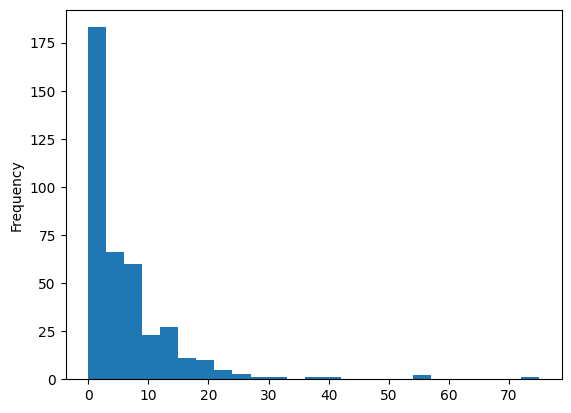

In [42]:
df.absences.plot(kind='hist', bins=25)

In [43]:
df.absences.describe()

,absences
count,395.000000
mean,5.708861
std,8.003096
min,0.000000
25%,0.000000
50%,4.000000
75%,8.000000
max,75.000000


- Pertama, kita dapat melihat bahwa banyak siswa memiliki ketidakhadiran nol.
- Kemudian, sebagian besar besar siswa memiliki nilai ketidakhadiran kurang dari atau sama dengan 5.
- Beberapa siswa berada di antara 5 dan 15, dan ada juga beberapa kasus ekstrim di mana total jumlah ketidakhadiran jauh di atas 15.
- Dari pengamatan ini, satu potensi diskritisasi data adalah sebagai berikut:

In [44]:
absences_discretized = pd.cut(df.absences, [0, 1, 5, 15, float("inf")], labels=[0, 1, 2, 3], right=False)
print(absences_discretized)

0      2
1      1
2      2
3      1
4      1
      ..
390    2
391    1
392    1
393    0
394    2
Name: absences, Length: 395, dtype: category
Categories (4, int64): [0 < 1 < 2 < 3]


- Perhatikanb bahwa `pd.cut` menerima objek `Series` Pandas dan menghasilkan objek Series yang didiskritkan.
- Argumen kedua (input) untuk `pd.cut` adalah daftar interval atau bin. Dalam kasus kita, kita ingin memiliki [0, 1), [1, 5), [5, 15), dan [15, inf) sebagai bin kita, yang mewakili 'tidak ada ketidakhadiran sama sekali', 'hanya beberapa ketidakhadiran', 'beberapa ketidakhadiran', dan 'banyak ketidakhadiran', sehingga bin menjadi `[0, 1, 5, 15, float("inf")]`.
- Perhatikan cara aneh untuk menyebutkan tak terhingga di Python.
- Juga, `right=False` di akhir argumen pd.cut menunjukkan bahwa interval (bin) tidak akan mencakup batas kanan. Jika diatur `True`, yang merupakan pengaturan default, intervalnya akan menjadi (0, 1], (1, 5], (5, 15], dan (15, inf], bukan (perhatikan tanda kurung dan tanda kurung siku).
- Sementara itu, dalam `pd.cut`, kita dapat menentukan label untuk setiap bin. Dalam contoh ini, kita menggunakan `0, 1, 2, 3` sebagai label untuk bin tersebut, masing-masing menunjukkan "tingkat ketidakhadiran".
- Secara teknis, bin dianggap sebagai variabel kategoris. Namun, dalam kasus kita, "kategori" tersebut sebenarnya memiliki urutan (yaitu ada pengertian magnitudo), berlawanan dengan contoh di atas. Dalam hal ini, variabel disebut variabel ordinal.
- Dengan demikian, kita mengganti kolom `absences` dengan kolom baru yang didiskritkan:

In [45]:
df['absences_discretized'] = absences_discretized.astype('int')   # add the new discretized column
df = df.drop(columns='absences')    # the original 'absences' column can be removed from table
df.head(5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,G1,G2,G3,guardian_father,guardian_mother,guardian_other,absences_discretized
0,1,1,18,1,1,0,4,4,3,0,2,2,2,0,1,0,0,0,1,1,0,0,4,3,4,1,1,3,5,6,6,0,1,0,2
1,1,1,17,1,1,1,1,1,3,4,2,1,2,0,0,1,0,0,0,1,1,0,5,3,3,1,1,3,5,5,6,1,0,0,1
2,1,1,15,1,0,1,1,1,3,4,3,1,2,3,1,0,1,0,1,1,1,0,4,3,2,2,3,3,7,8,10,0,1,0,2
3,1,1,15,1,1,1,4,2,1,2,0,1,3,0,0,1,1,1,1,1,1,1,3,2,2,1,1,5,15,14,15,0,1,0,1
4,1,1,16,1,1,1,3,3,4,4,0,1,2,0,0,1,1,0,1,1,0,0,4,3,2,1,2,5,6,10,10,1,0,0,1


#### Tugas --> silahkan berdiskusi dengan teman, lalu tulis kode program sendiri-sendiri

- Selain `absences`, kolom lain apa yang bisa di-discretized?
- Dapatkah Anda menemukan dua atau lebih kolom yang dapat digabungkan dan didiskritkan bersama? Harap jelaskan.
- Tulis jawaban di cell bawah ini, lalu tulis juga program diskretisasinya.

In [46]:
df['age_discrete'] = pd.cut(df['age'], bins=[15, 17, 19, 22, 25], labels=[0, 1, 2, 3], right=False)
df['age_G1_discrete'] = pd.cut(df['age'] + df['G1'], bins=[15, 25, 35, 45, 55], labels=[0, 1, 2, 3], right=False)

df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,G1,G2,G3,guardian_father,guardian_mother,guardian_other,absences_discretized,age_discrete,age_G1_discrete
0,1,1,18,1,1,0,4,4,3,0,2,2,2,0,1,0,0,0,1,1,0,0,4,3,4,1,1,3,5,6,6,0,1,0,2,1,0
1,1,1,17,1,1,1,1,1,3,4,2,1,2,0,0,1,0,0,0,1,1,0,5,3,3,1,1,3,5,5,6,1,0,0,1,1,0
2,1,1,15,1,0,1,1,1,3,4,3,1,2,3,1,0,1,0,1,1,1,0,4,3,2,2,3,3,7,8,10,0,1,0,2,0,0
3,1,1,15,1,1,1,4,2,1,2,0,1,3,0,0,1,1,1,1,1,1,1,3,2,2,1,1,5,15,14,15,0,1,0,1,0,1
4,1,1,16,1,1,1,3,3,4,4,0,1,2,0,0,1,1,0,1,1,0,0,4,3,2,1,2,5,6,10,10,1,0,0,1,0,0


### 1.4. Aggregation

- Beberapa metrik penting dalam tabel adalah nilai (`G1`, `G2`, dan `G3`).
- Kinerja siswa dilacak selama periode waktu.
- `G1`, `G2`, dan `G3` mencerminkan perubahan kinerja siswa seiring waktu.
- Dalam beberapa kasus, penggabungan kolom-kolom ini menjadi satu nilai dapat mengurangi kebingungan.
- Agregasi kolom dilakukan dengan menghitung rata-rata nilai.
- Istilah agregasi data umumnya digunakan untuk ukuran nilai yang lebih kompleks daripada hanya tiga kolom.
- Contoh ini bertujuan untuk memberi gambaran tentang proses agregasi data di Pandas tanpa memperumit contoh.

In [47]:
G_agg = df[ ['G1', 'G2', 'G3'] ].agg('mean', axis='columns')
print(G_agg)

0       5.666667
1       5.333333
2       8.333333
3      14.666667
4       8.666667
         ...    
390     9.000000
391    15.333333
392     8.333333
393    11.000000
394     8.666667
Length: 395, dtype: float64


In [48]:
df['G_agg'] = G_agg
df = df.drop(columns=['G1', 'G2', 'G3'])
df.head(5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,guardian_father,guardian_mother,guardian_other,absences_discretized,age_discrete,age_G1_discrete,G_agg
0,1,1,18,1,1,0,4,4,3,0,2,2,2,0,1,0,0,0,1,1,0,0,4,3,4,1,1,3,0,1,0,2,1,0,5.666667
1,1,1,17,1,1,1,1,1,3,4,2,1,2,0,0,1,0,0,0,1,1,0,5,3,3,1,1,3,1,0,0,1,1,0,5.333333
2,1,1,15,1,0,1,1,1,3,4,3,1,2,3,1,0,1,0,1,1,1,0,4,3,2,2,3,3,0,1,0,2,0,0,8.333333
3,1,1,15,1,1,1,4,2,1,2,0,1,3,0,0,1,1,1,1,1,1,1,3,2,2,1,1,5,0,1,0,1,0,1,14.666667
4,1,1,16,1,1,1,3,3,4,4,0,1,2,0,0,1,1,0,1,1,0,0,4,3,2,1,2,5,1,0,0,1,0,0,8.666667


### PERHATIAN: Pastikan tidak ada variabel string sebelum melanjutkan ke bagian berikutnya.
- Kewajiban Nilai Numerik: Semua nilai dalam tabel harus berupa angka untuk menjalankan contoh di bagian selanjutnya.
- Pemeriksaan: Jika Anda telah menyelesaikan tugas di atas, Anda seharusnya tidak mengalami masalah.
- Alternatif: Jika masih ada variabel string, Anda dapat menghapus sel-sel tersebut, seperti yang ditunjukkan di bawah ini.

In [49]:
df = df.drop(columns=['school', 'address', 'Pstatus', 'Mjob', 'Fjob', 'reason',
                      'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic'])

## 2. Visualization

- Pentingnya Visualisasi Data:
    - Memvisualisasikan, melihat, dan memahami data adalah krusial dalam analisis data.
    - Gunakan persepsi dan kognisi manusia serta akal sehat saat menganalisis data.
- Hindari Pendekatan Terburu-buru:
    - Jangan langsung menerapkan algoritma pembelajaran mesin (ML) yang canggih tanpa pemahaman yang mendalam.
- Manfaat Visualisasi di Tahap Awal:
    - Visualisasi mungkin tampak tidak perlu atau melelahkan, tetapi sangat berharga untuk:
        - Mempelajari banyak hal dari data.
        - Mengembangkan wawasan yang membantu merancang model yang lebih baik.
        - Menghasilkan kesimpulan yang lebih produktif.
- Pendekatan yang Akan Dipelajari:
    - Beberapa pendekatan sederhana seperti PCA, MDS, dan t-SNE akan dibahas di bagian ini.


### 2.1. Dimension Reduction

- Masalah Visualisasi:
    - Visualisasi data berkaitan erat dengan masalah reduksi dimensi.
    - Persepsi manusia terbatas pada ruang dimensi yang relatif lebih rendah.
- Dimensi yang Nyaman:
    - Dimensi dua (i.e., bidang) adalah yang paling nyaman bagi manusia.
    - Penambahan dimensi (seperti sumbu "z", warna, glyph, atau ukuran data) seringkali dapat dilakukan, tetapi literatur menyarankan untuk tetap di bawah enam dimensi agar tetap nyaman secara kognitif.
- Tantangan:
    - Bagaimana memplot data yang sering kali memiliki lebih dari enam dimensi ke dalam ruang dimensi yang lebih rendah, seperti bidang dua dimensi.
- PCA sebagai Solusi:
    - Jika data terdistribusi secara linier, Principal Component Analysis (PCA) bisa sangat berguna.
    - PCA bertujuan untuk menemukan principal components yang mewakili arah varians terbesar dalam data.
    
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/f/f5/GaussianScatterPCA.svg/1200px-GaussianScatterPCA.svg.png" width=400 />

- Rencana Pembelajaran:
    - Kita akan mendalami detail matematis PCA di akhir semester.
    - Topik yang akan dibahas meliputi nilai eigen, kovarians, dan beberapa topik lain dari aljabar linier serta statistik multivariat.
- Sederhanakan Proses:
    - Untuk saat ini, agar tetap sederhana dan tidak menakutkan, kita akan memanfaatkan implementasi PCA dari pihak ketiga.
- Perkenalan Scikit-learn:
    - Kita akan menggunakan pustaka Scikit-learn sebagai alat untuk mengimplementasikan PCA.

In [33]:
!pip install scikit-learn

Sekali Scikit-learn terinstall, Anda dapat melakukan import fungsi `PCA` dari `decomposition` module di Scikit-learn:

In [50]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)     # interested in reducing the dimension to 2-D
projected = pd.DataFrame(pca.fit_transform(df), columns=['PC1', 'PC2'])    # convert it back to pandas DataFrame
print(projected)

          PC1       PC2
0   -4.830750 -0.806500
1   -5.445364 -1.594019
2   -2.630206 -0.284830
3    4.234435 -2.121582
4   -1.875575 -1.425598
..        ...       ...
390 -2.273954  5.059450
391  4.314806  3.297681
392 -3.074506  3.234012
393  0.128531  1.752591
394 -2.428625  2.118196

[395 rows x 2 columns]


Sekarang, projected data bisa divisualisasi dengan scatter plot:

<Axes: xlabel='PC1', ylabel='PC2'>

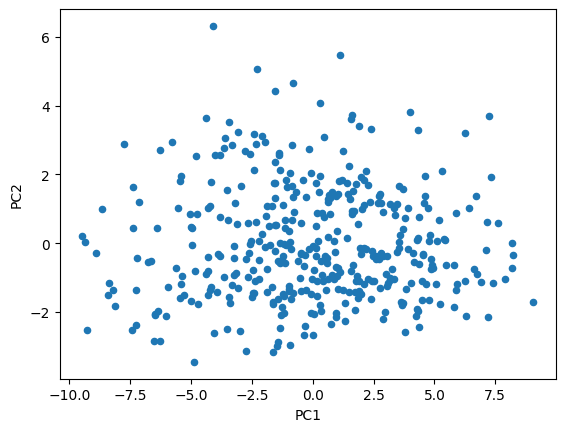

In [51]:
projected.plot(kind='scatter', x='PC1', y='PC2')

Menambahkan warna ke plot berdasarkan nilai suatu atreibut akan memberi tambahan insight:

<ipython-input-52-97f6a4f5c915>:1: UserWarning: 'color' and 'colormap' cannot be used simultaneously. Using 'color'
  projected.plot(kind='scatter', x='PC1', y='PC2', color=df.G_agg, colormap='cool')


<Axes: xlabel='PC1', ylabel='PC2'>

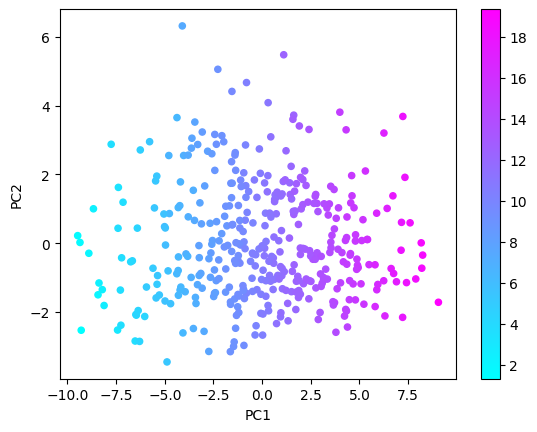

In [52]:
projected.plot(kind='scatter', x='PC1', y='PC2', color=df.G_agg, colormap='cool')

<ipython-input-53-fc0b8711e706>:1: UserWarning: 'color' and 'colormap' cannot be used simultaneously. Using 'color'
  projected.plot(kind='scatter', x='PC1', y='PC2', color=df.Walc, colormap='cool')


<Axes: xlabel='PC1', ylabel='PC2'>

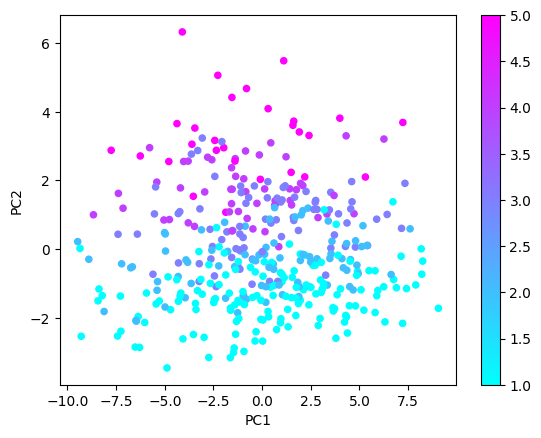

In [53]:
projected.plot(kind='scatter', x='PC1', y='PC2', color=df.Walc, colormap='cool')

Di sini, tanpa membahas terlalu banyak detail, satu hal yang perlu diperhatikan adalah bahwa komponen utama sebenarnya merupakan kombinasi linier (yaitu jumlah tertimbang) dari atribut. Kontribusi atribut terhadap setiap komponen utama dapat diukur dengan melihat koefisien:

<Axes: >

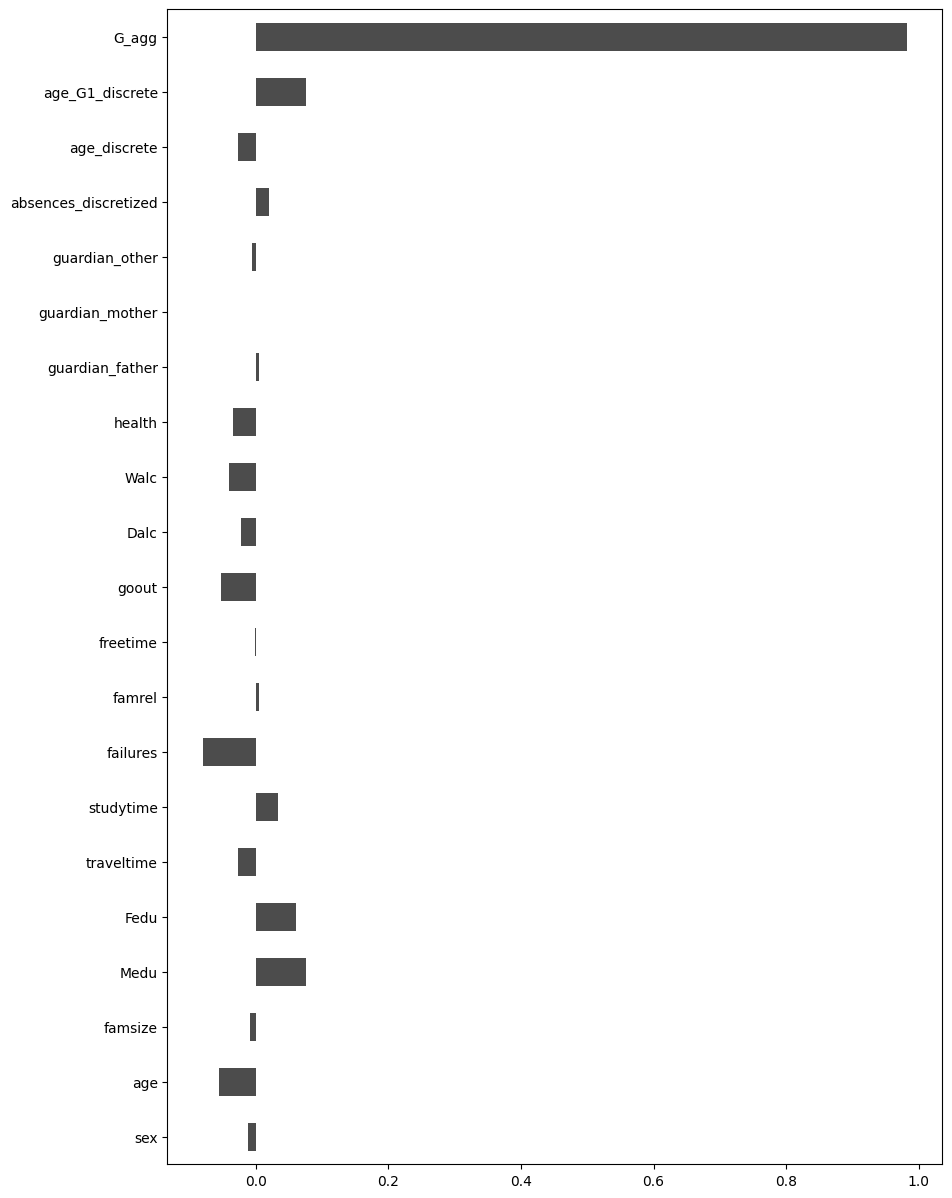

In [54]:
attrib = list(df)         # get attribute names
pcdata  = pd.Series(pca.components_[0], index=attrib)  # zero-th principal component
pcdata.plot(kind='barh',color='k',alpha=0.7, figsize=(10,15))

<Axes: >

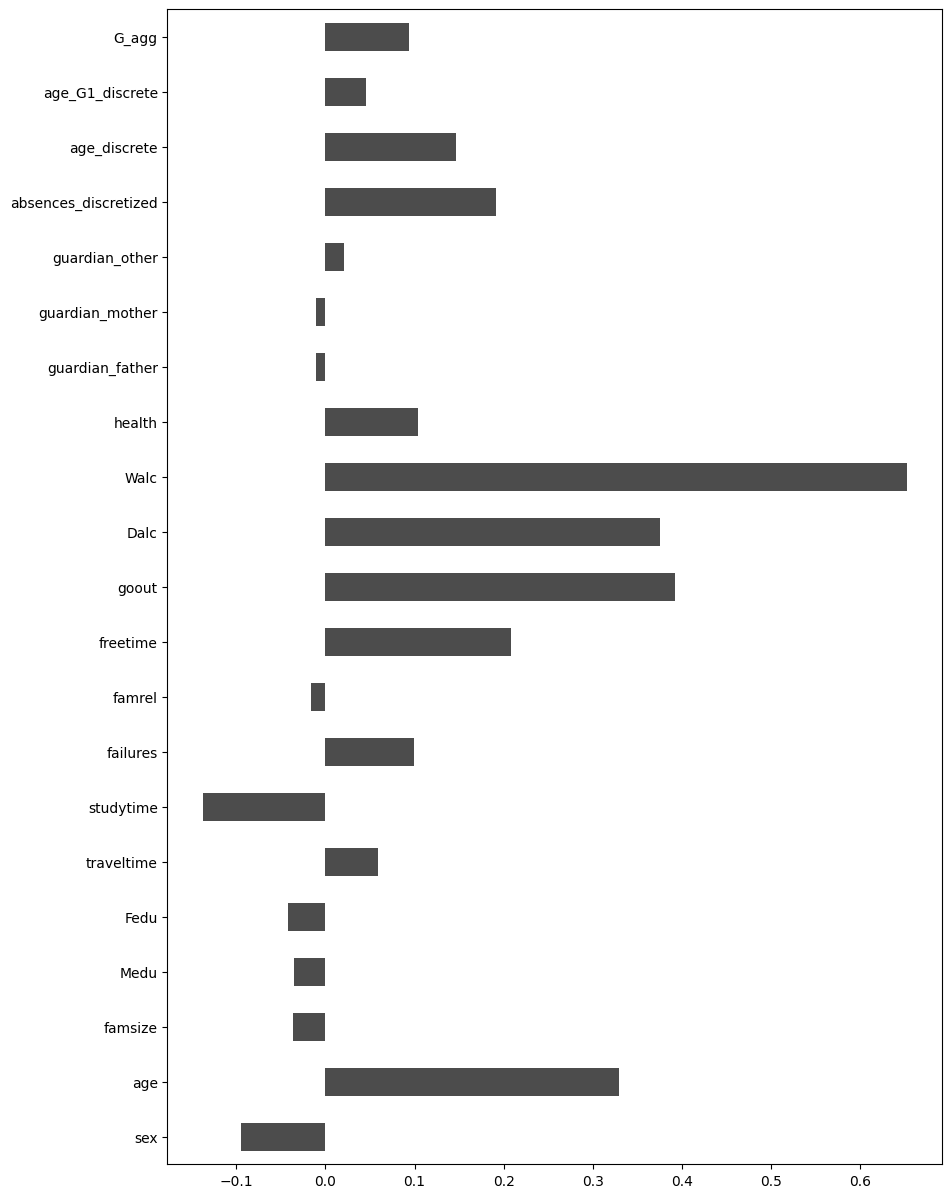

In [55]:
pcdata  = pd.Series(pca.components_[1], index=attrib)
pcdata.plot(kind='barh',color='k',alpha=0.7, figsize=(10,15))

#### Tugas --> silahkan berdiskusi dengan teman, lalu tulis kode program sendiri-sendiri
- Bagaimana Anda menginterpretasi visualisasi di atas?
- Variabel apa yang punya korelasi tertinggi dengan student's performance?
- Variabel apa yang paling berkorelasi dengan konsumsi alcohol?

(Jawab disini)
1. Visualisasi menunjukkan tingkat korelasi antara setiap variabel dengan target (student's performance).
- Koefisien positif berarti variabel tersebut memiliki korelasi positif dengan target, artinya jika variabel ini meningkat, target juga cenderung meningkat.
- Koefisien negatif berarti variabel tersebut berkorelasi negatif dengan target, artinya jika variabel ini meningkat, target cenderung menurun.

2. Variabel dengan korelasi tertinggi dengan student's performance:
Walc (weekend alcohol consumption) memiliki korelasi negatif paling kuat, artinya semakin banyak siswa minum alkohol di akhir pekan, semakin buruk performa mereka.

3. Variabel dengan korelasi tertinggi dengan konsumsi alkohol:
Goout (waktu yang dihabiskan keluar) paling berkorelasi dengan konsumsi alkohol, terutama saat akhir pekan (Walc).

Mirip dengan PCA, ada metode lain yang disebut Penskalaan Multidimensi, dan t-SNE. Sekali lagi, kita tidak akan membahas detailnya kali ini, tetapi akan menunda pembahasan teknis di pertemuan lain. Untuk saat ini, mari kita kembangkan pemahaman intuitif cepat bahwa MDS hanyalah algoritma pengurangan dimensionalitas yang mencoba mempertahankan jarak di antara titik data sebelum dan sesudah proyeksi dan bahwa t-SNE hanyalah versi non-linier dari MDS.

Seperti PCA, keduanya juga tersedia di Sklearn, tetapi kali ini, di bawah modul `manifold`:

In [58]:
from sklearn.manifold import MDS, TSNE

Walaupun anamanya berbeda, penggunaannya sama dengan PCA.

In [59]:
projected_mds = MDS(n_components=2).fit_transform(df)
projected_mds = pd.DataFrame(projected_mds, columns=['MDS1', 'MDS2'])
projected_mds.head(5)

,MDS1,MDS2
0,0.623280,5.925959
1,-1.018577,6.373773
2,1.759739,3.973285
3,-1.975210,-5.043233
4,0.207733,2.245749


<Axes: xlabel='MDS1', ylabel='MDS2'>

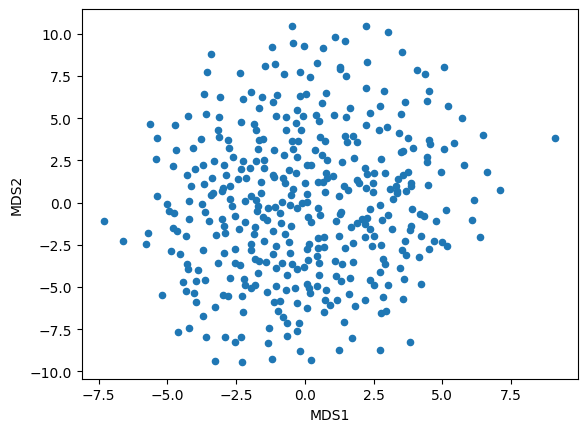

In [60]:
projected_mds.plot(kind='scatter', x='MDS1', y='MDS2')

<ipython-input-61-bb8d1f76dc50>:1: UserWarning: 'color' and 'colormap' cannot be used simultaneously. Using 'color'
  projected_mds.plot(kind='scatter', x='MDS1', y='MDS2', color=df.G_agg, colormap='cool')


<Axes: xlabel='MDS1', ylabel='MDS2'>

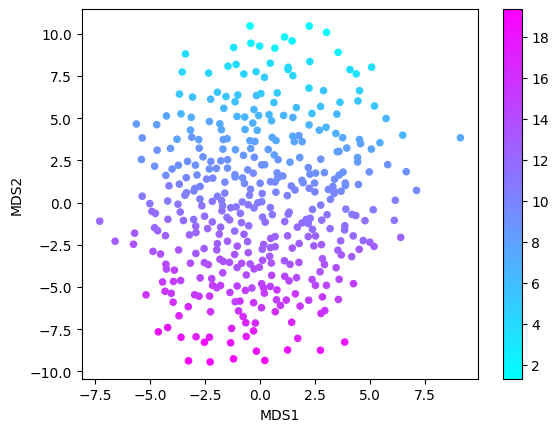

In [61]:
projected_mds.plot(kind='scatter', x='MDS1', y='MDS2', color=df.G_agg, colormap='cool')

<ipython-input-62-f45fe413d364>:1: UserWarning: 'color' and 'colormap' cannot be used simultaneously. Using 'color'
  projected_mds.plot(kind='scatter', x='MDS1', y='MDS2', color=df.Walc, colormap='cool')


<Axes: xlabel='MDS1', ylabel='MDS2'>

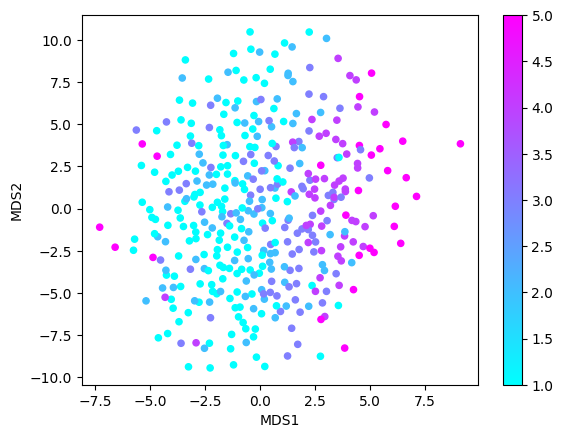

In [62]:
projected_mds.plot(kind='scatter', x='MDS1', y='MDS2', color=df.Walc, colormap='cool')

Demikian juga dengan tSNE

In [63]:
projected_tsne = TSNE(n_components=2).fit_transform(df)
projected_tsne = pd.DataFrame(projected_tsne, columns=['TSNE1', 'TSNE2'])
projected_tsne.head(5)

,TSNE1,TSNE2
0,-13.139942,-6.672478
1,-17.178030,-9.526405
2,-16.085333,1.164786
3,7.409092,15.703309
4,-11.628048,3.283251


<ipython-input-64-5ea9d0b1283a>:1: UserWarning: 'color' and 'colormap' cannot be used simultaneously. Using 'color'
  projected_tsne.plot(kind='scatter', x='TSNE1', y='TSNE2', color=df.G_agg, colormap='cool')


<Axes: xlabel='TSNE1', ylabel='TSNE2'>

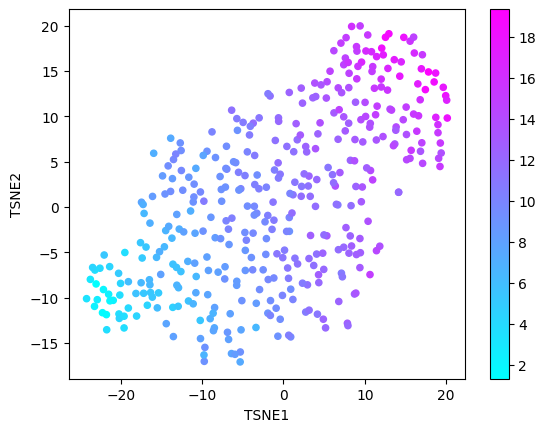

In [64]:
projected_tsne.plot(kind='scatter', x='TSNE1', y='TSNE2', color=df.G_agg, colormap='cool')

<ipython-input-65-7d850890b2c9>:1: UserWarning: 'color' and 'colormap' cannot be used simultaneously. Using 'color'
  projected_tsne.plot(kind='scatter', x='TSNE1', y='TSNE2', color=df.Walc, colormap='cool')


<Axes: xlabel='TSNE1', ylabel='TSNE2'>

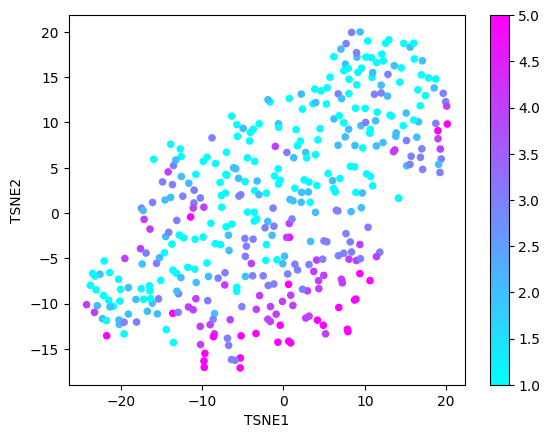

In [65]:
projected_tsne.plot(kind='scatter', x='TSNE1', y='TSNE2', color=df.Walc, colormap='cool')

#### Tugas --> silahkan berdiskusi dengan teman, lalu tulis kode program sendiri-sendiri

- Visualisasi variabel lain, misalnya `G_agg` dan `Walc`.
- Insight apa yang Anda dapatkan dari visualisasi? Bagaimana menginterpretasikannya?
- Jadi, apa pentingnya memvisualisasi data sebelum train/test statistical model?

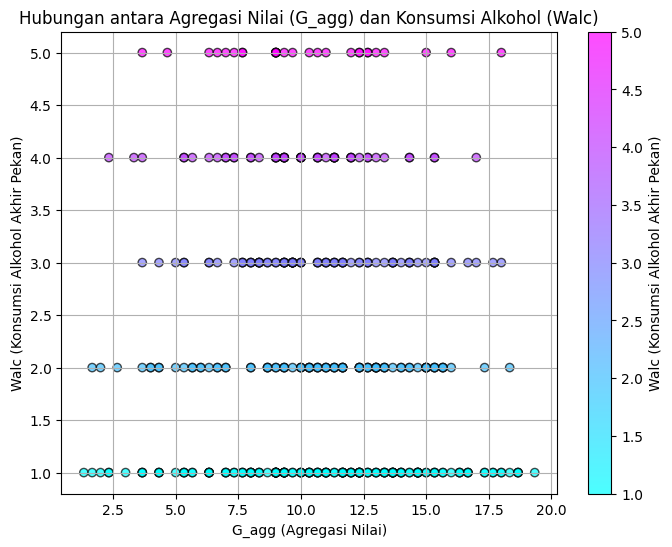

In [69]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
data = {
    'G_agg': np.random.randint(50, 100, 100),  # Agregasi nilai
    'Walc': np.random.randint(1, 5, 100),      # Konsumsi alkohol
}

plt.figure(figsize=(8, 6))
plt.scatter(df['G_agg'], df['Walc'], c=df['Walc'], cmap='cool', edgecolor='k', alpha=0.7)
plt.colorbar(label='Walc (Konsumsi Alkohol Akhir Pekan)')
plt.title('Hubungan antara Agregasi Nilai (G_agg) dan Konsumsi Alkohol (Walc)')
plt.xlabel('G_agg (Agregasi Nilai)')
plt.ylabel('Walc (Konsumsi Alkohol Akhir Pekan)')
plt.grid(True)
plt.show()

Pengumpulan:
https://forms.gle/7RyewE1EfzWpqffVA
